<a href="https://colab.research.google.com/github/ELBrown11/KaggleCompetitionSubmission/blob/main/Best_of_KNNCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kaggle Digit Recognizer Competition Submission**

https://www.kaggle.com/c/digit-recognizer

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.metrics import mean_squared_error, classification_report, \
confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow.keras as keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [3]:
#read data
train_file = '/content/drive/MyDrive/digit-recognizer/train.csv'
test_file = '/content/drive/MyDrive/digit-recognizer/test.csv'

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

labels = train_df.iloc[:,0].values.astype('int32')

X_train = (train_df.iloc[:,1:].values).astype('float32')

# convert list of labels to binary class matrix
y_train = np_utils.to_categorical(labels) 
X_test = (test_df.values).astype('float32')



input_shape = X_train.shape[1]
nb_classes = y_train.shape[1]
nb_classes

10

In [4]:
#fit and transform test and train data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
#function to shorten time is takes to create plots
def plot_history(history, metric=None):
 
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

## **Model Attempt 1** 

In [7]:
#neural network
input_shape = X_train.shape[1]
model1 = Sequential()

model1.add(Dense(10, activation='relu',
                 input_dim =input_shape))
model1.add(Dense(20))
model1.add(Dense(10, activation='softmax'))


#compile model
model1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#fit model
history1 = model1.fit(X_train,y_train,
                    epochs=100, 
                    validation_split=.1,
                     verbose=0)

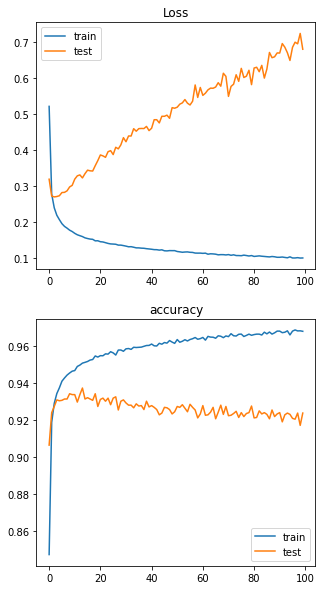

In [8]:
#use plot function to verify how the model is doing
plot_history(history1, 'accuracy')

## **Model Attempt 2 (Best So Far)**

In [9]:
#neural network
input_shape = X_train.shape[1]
model2 = Sequential()

model2.add(Dense(10, activation='relu', 
                 input_dim =input_shape))
model2.add(Dropout(.2)) #added dropout layer to decrease overfitting
model2.add(Dense(25)) #increase number of nodes from 20 to 25 
model2.add(Dense(10, activation='softmax'))


#compile model
model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#fit model
history2 = model2.fit(X_train,y_train,
                    epochs=200, #increased number of epochs
                    validation_split=.1)

Epoch 1/200
1182/1182 [==============================] - 3s 2ms/step - loss: 0.8175 - accuracy: 0.7294 - val_loss: 0.3726 - val_accuracy: 0.8962
Epoch 2/200
1182/1182 [==============================] - 3s 2ms/step - loss: 0.6005 - accuracy: 0.8024 - val_loss: 0.3463 - val_accuracy: 0.8964
Epoch 3/200
1182/1182 [==============================] - 3s 2ms/step - loss: 0.5697 - accuracy: 0.8148 - val_loss: 0.3519 - val_accuracy: 0.9002
Epoch 4/200
1182/1182 [==============================] - 3s 2ms/step - loss: 0.5465 - accuracy: 0.8228 - val_loss: 0.3381 - val_accuracy: 0.9050
Epoch 5/200
1182/1182 [==============================] - 5s 4ms/step - loss: 0.5285 - accuracy: 0.8252 - val_loss: 0.3280 - val_accuracy: 0.9069
Epoch 6/200
1182/1182 [==============================] - 5s 4ms/step - loss: 0.5254 - accuracy: 0.8279 - val_loss: 0.3441 - val_accuracy: 0.9052
Epoch 7/200
1182/1182 [==============================] - 3s 2ms/step - loss: 0.5149 - accuracy: 0.8295 - val_loss: 0.3365 - val_ac

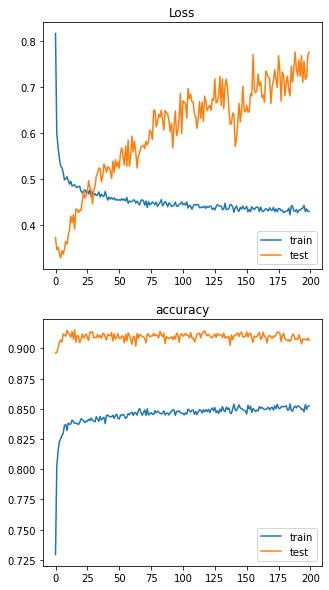

In [10]:
#use plot function to verify how the model is doing
plot_history(history2, 'accuracy')

# **Submission Screenshot**

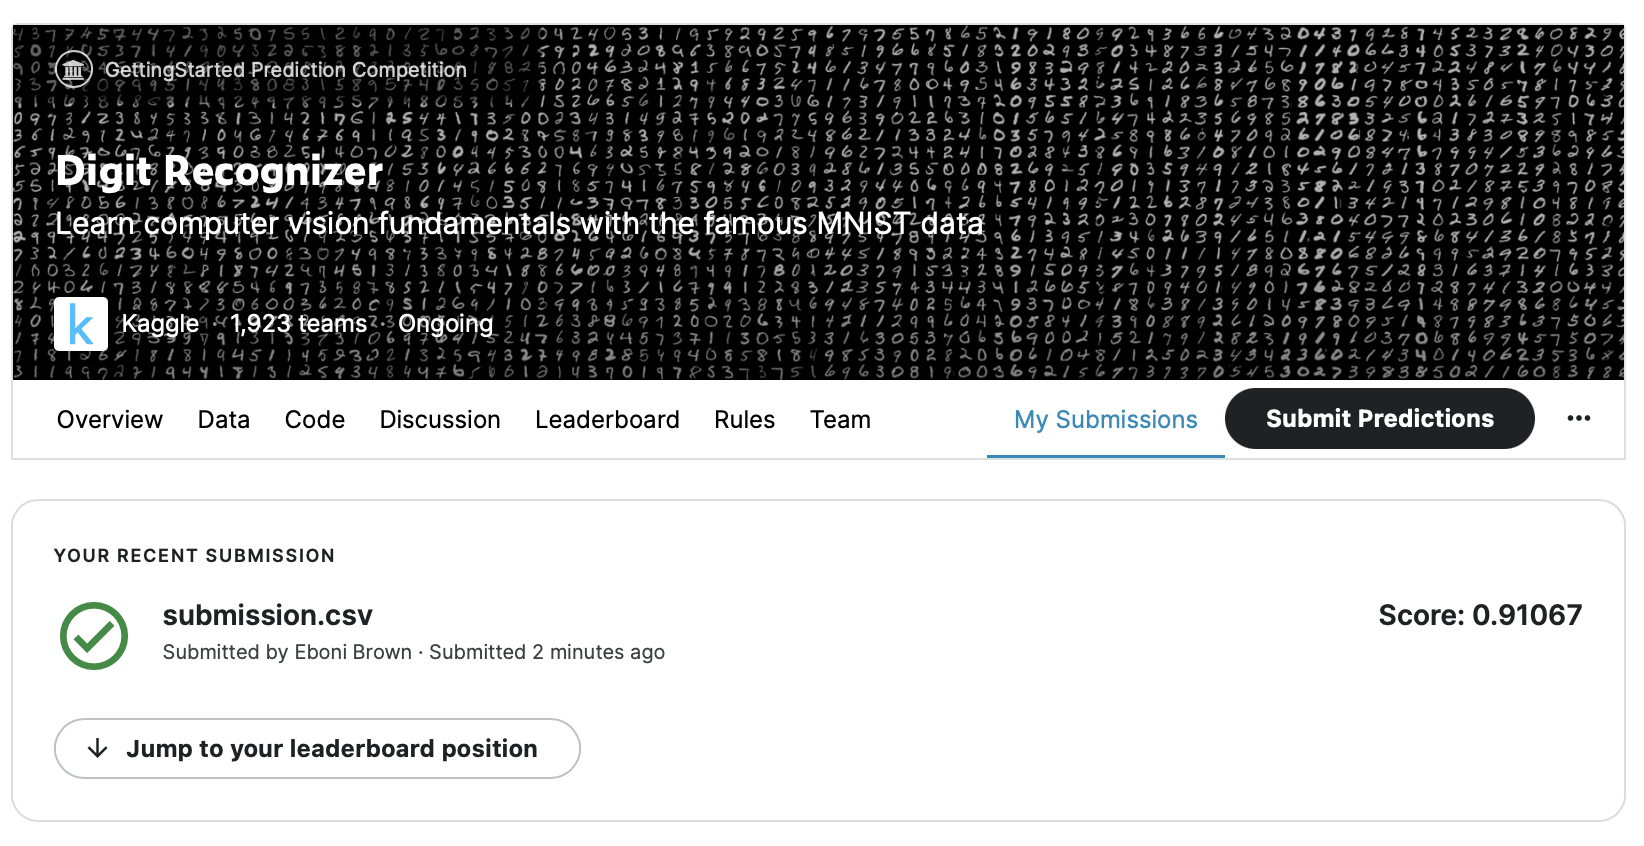

# **References**

- https://www.kaggle.com/fchollet/simple-deep-mlp-with-keras/code